## Imports 


In [1]:
from data.dataset import load_adult_dataset
from model.naive_bayes import NaiveBayes
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score , recall_score, precision_score, f1_score , confusion_matrix
from sklearn.naive_bayes import MultinomialNB

## Load dataset

In [2]:

data = load_adult_dataset(path="./data/adult.csv")

x_train, y_train = data["x_train"], data["y_train"]
x_val, y_val = data["x_val"], data["y_val"]
x_test, y_test = data["x_test"], data["y_test"]

target = data["target_name"]
feature_names = data["feature_names"]

print("Number of features:", len(feature_names))
print("Feature names:", feature_names)
print("="*50)

print("Target name:", target)
print("Target values:", np.unique(y_train))
print("="*50)

print("Training set shape:", x_train.shape)
print("Validation set shape:", x_val.shape)
print("Testing set shape:", x_test.shape)



Number of features: 8
Feature names: ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
Target name: income
Target values: ['<=50K' '>50K']
Training set shape: (22792, 8)
Validation set shape: (4884, 8)
Testing set shape: (4885, 8)


## Class distribution 

In [3]:
print("Training set class distribution:")
print(y_train.value_counts())

print("\nTraining set class Percentage:")
print(y_train.value_counts(normalize=True)*100)

Training set class distribution:
income
<=50K    17303
>50K      5489
Name: count, dtype: int64

Training set class Percentage:
income
<=50K    75.916988
>50K     24.083012
Name: proportion, dtype: float64


## Feature-Target relationship

Feature: workclass vs Target: income
income          <=50K       >50K
workclass                       
0.0         75.599129  24.400871
1.0         71.992654  28.007346
2.0         75.283447  24.716553
3.0        100.000000   0.000000
4.0         74.005759  25.994241
5.0         72.064057  27.935943
6.0         73.086030  26.913970
7.0         75.422427  24.577573
8.0         77.777778  22.222222
Feature: education vs Target: income
income         <=50K       >50K
education                      
0.0        75.488069  24.511931
1.0        72.820513  27.179487
2.0        76.470588  23.529412
3.0        77.500000  22.500000
4.0        74.172185  25.827815
5.0        70.285714  29.714286
6.0        78.260870  21.739130
7.0        75.963303  24.036697
8.0        73.037037  26.962963
9.0        73.996248  26.003752
10.0       73.469388  26.530612
11.0       73.772083  26.227917
12.0       73.001159  26.998841
13.0       66.666667  33.333333
14.0       70.397112  29.602888
15.0       74.24626

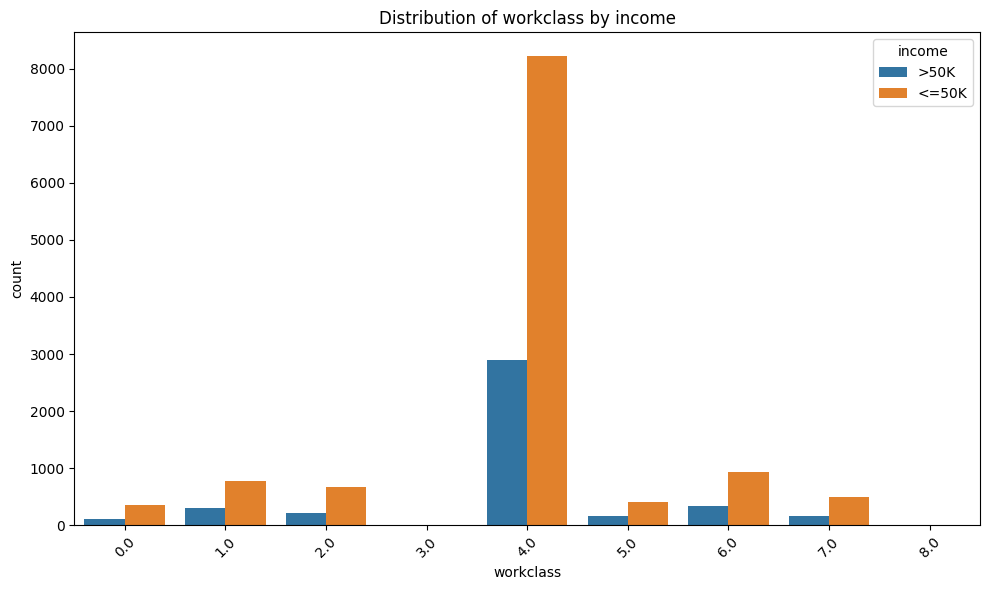

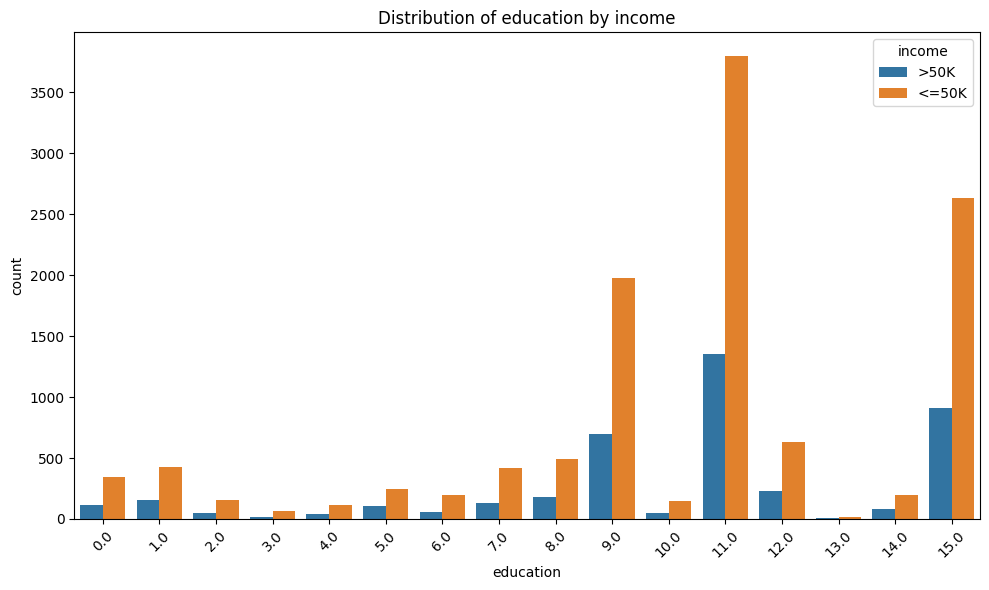

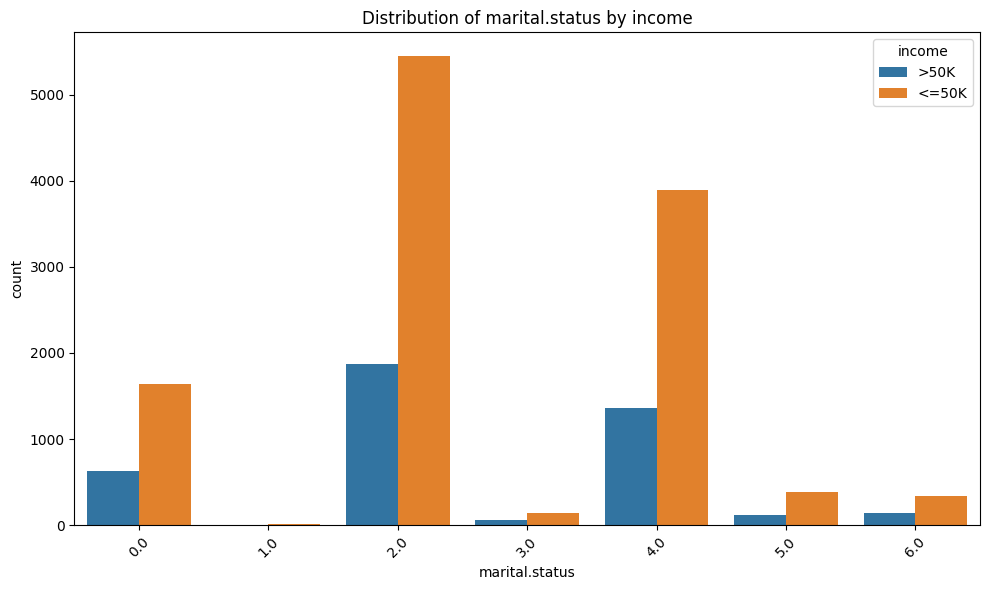

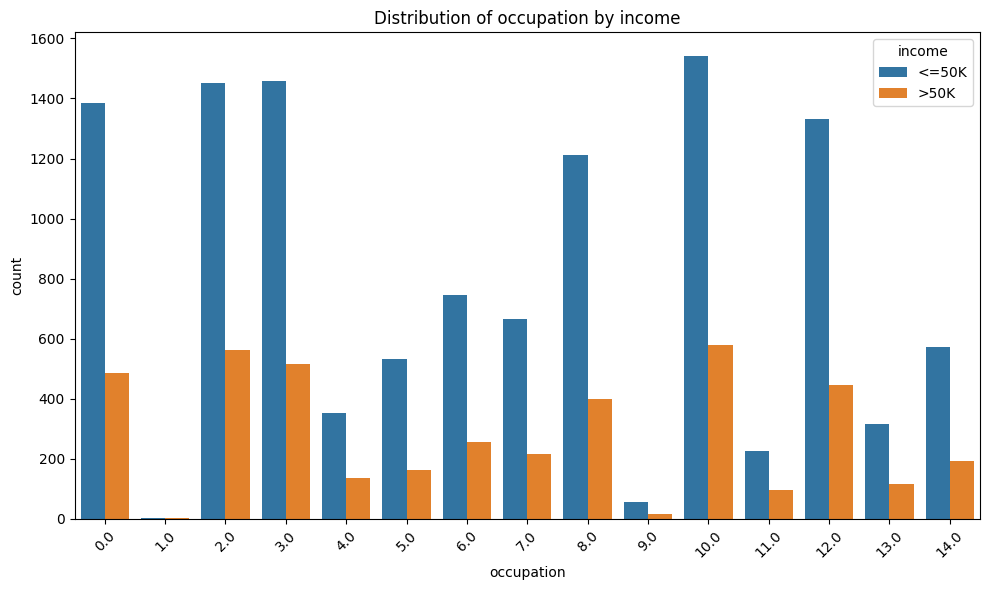

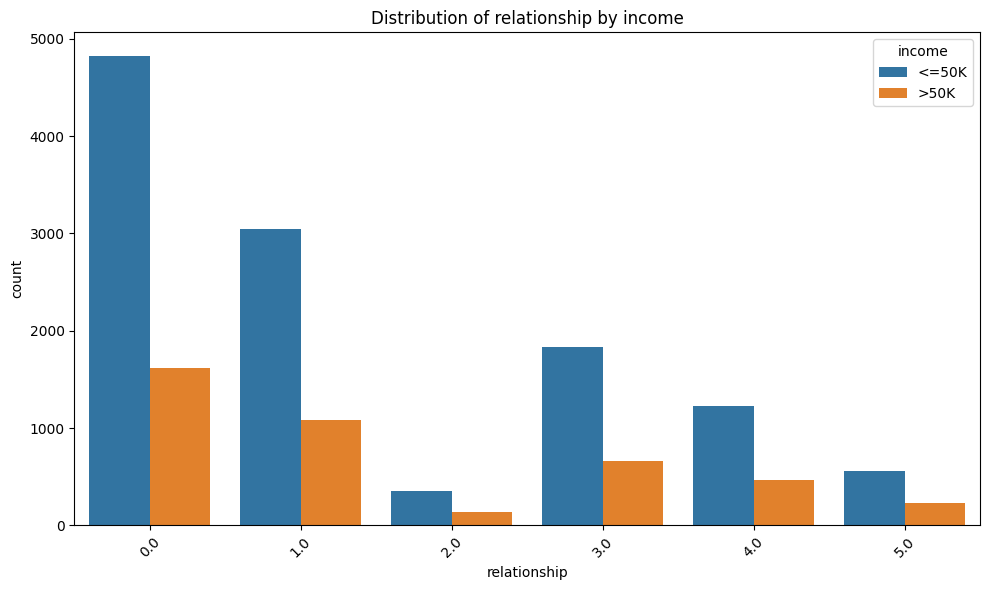

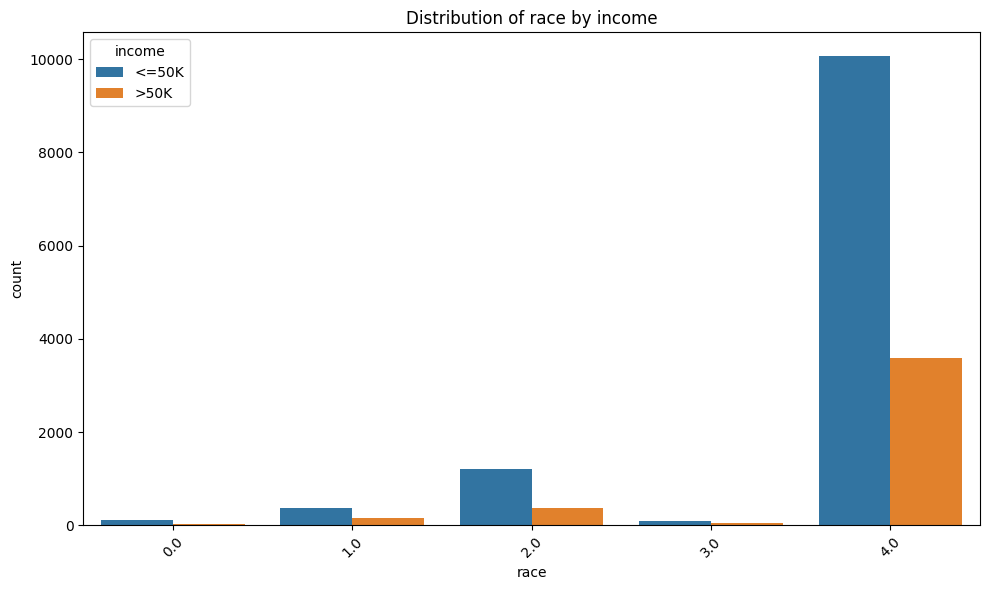

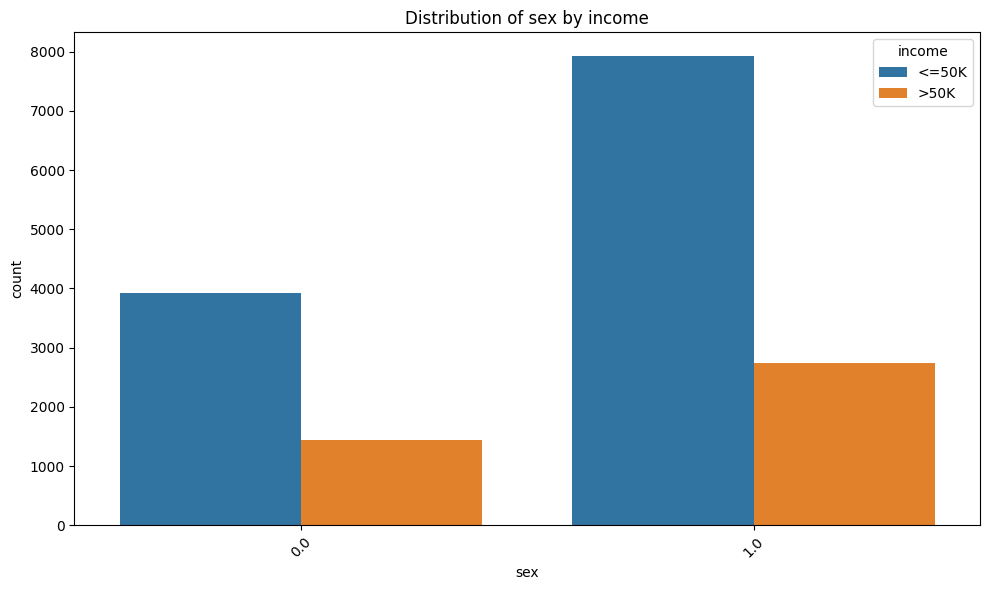

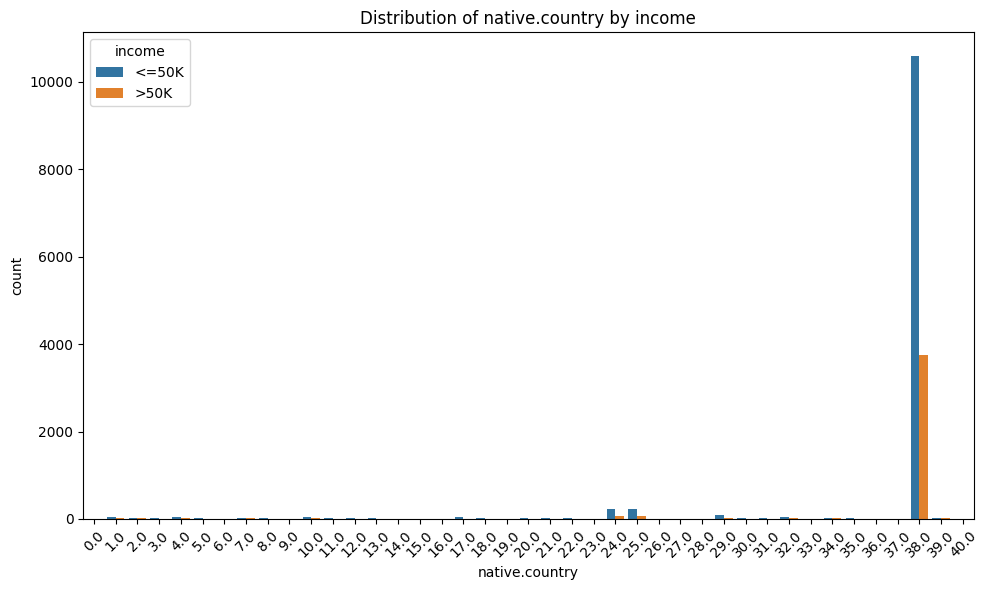

In [4]:
df_train = pd.DataFrame(x_train, columns=feature_names)
df_train[target] = y_train

for col in feature_names:

   print(f"Feature: {col} vs Target: {target}")
   cross_tab = pd.crosstab(df_train[col], df_train[target], normalize='index') * 100
   print(cross_tab)
   print("="*50)

for col in feature_names:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_train, x=col, hue=target)
    plt.title(f'Distribution of {col} by {target}')
    plt.xticks(rotation=45)
    plt.legend(title=target)
    plt.tight_layout()
    plt.show()


## Naive Bayes Manual Model


In [5]:
nb_manual = NaiveBayes(alpha=1.0)

# Train model
nb_manual.train(x_train, y_train)

# Predict on validation set
y_val_pred = nb_manual.predict(x_val)  
y_val_prob = nb_manual.predict_prob(x_val)

## Evaluation of Manual Model

Validation Accuracy: 78.8903
Validation Precision: 54.6385
Validation Recall: 72.6190
Validation F1 Score: 62.3585

Confusion Matrix on Validation Set:


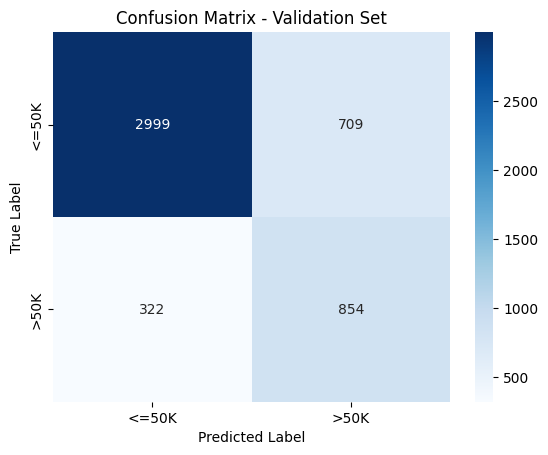


Test Accuracy: 79.1812
Test Precision: 55.0994
Test Recall: 73.0442
Test F1 Score: 62.8154

Confusion Matrix on Test Set:


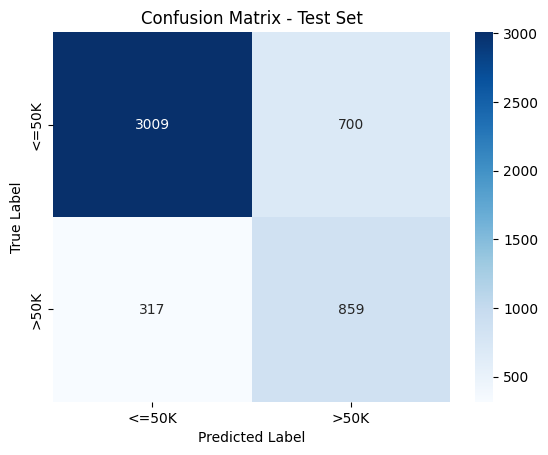

In [6]:

val_accuracy = accuracy_score(y_val, y_val_pred) * 100
print(f"Validation Accuracy: {val_accuracy:.4f}")
val_precision = precision_score(y_val, y_val_pred, pos_label='>50K') * 100
print(f"Validation Precision: {val_precision:.4f}")
val_recall = recall_score(y_val, y_val_pred, pos_label='>50K') * 100
print(f"Validation Recall: {val_recall:.4f}")
val_f1 = f1_score(y_val, y_val_pred, pos_label='>50K') * 100
print(f"Validation F1 Score: {val_f1:.4f}")

print("\nConfusion Matrix on Validation Set:")
cm_val = confusion_matrix(y_val, y_val_pred, labels=['<=50K', '>50K'])
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Validation Set')
plt.show()

print()

y_test_pred = nb_manual.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred) * 100
print(f"Test Accuracy: {test_accuracy:.4f}")
test_precision = precision_score(y_test, y_test_pred, pos_label='>50K') * 100
print(f"Test Precision: {test_precision:.4f}")
test_recall = recall_score(y_test, y_test_pred, pos_label='>50K') * 100
print(f"Test Recall: {test_recall:.4f}")
test_f1 = f1_score(y_test, y_test_pred, pos_label='>50K') * 100
print(f"Test F1 Score: {test_f1:.4f}")

print("\nConfusion Matrix on Test Set:")
cm_test = confusion_matrix(y_test, y_test_pred, labels=['<=50K', '>50K'])
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Set')
plt.show()  

## Tuning for best smoothing parameter : alpha

Alpha=0.1: Validation Accuracy=78.9312 Precision=54.7146 Recall=72.5340 F1 Score=62.3766
Alpha=0.5: Validation Accuracy=78.9107 Precision=54.6735 Recall=72.6190 F1 Score=62.3813
Alpha=1.0: Validation Accuracy=78.8903 Precision=54.6385 Recall=72.6190 F1 Score=62.3585
Alpha=2.0: Validation Accuracy=78.8903 Precision=54.6385 Recall=72.6190 F1 Score=62.3585
Alpha=5.0: Validation Accuracy=78.8493 Precision=54.5570 Recall=72.7891 F1 Score=62.3679


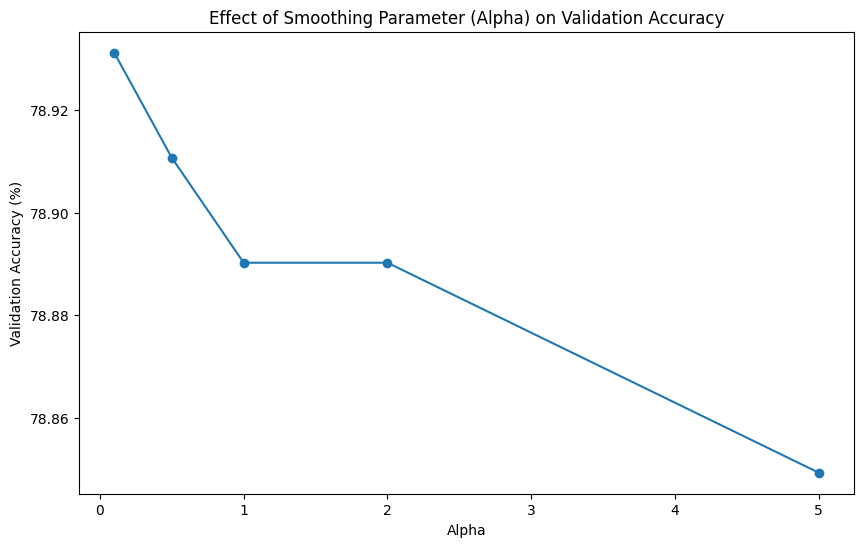

Best alpha: 0.1


In [7]:
alphas = [0.1, 0.5, 1.0, 2.0, 5.0]
results = {}

for alpha in alphas:
    nb = NaiveBayes(alpha=alpha)
    nb.train(x_train, y_train)
    y_val_pred = nb.predict(x_val)
    acc = accuracy_score(y_val, y_val_pred) * 100
    precision = precision_score(y_val, y_val_pred, pos_label='>50K') * 100
    recall = recall_score(y_val, y_val_pred, pos_label='>50K') * 100
    f1 = f1_score(y_val, y_val_pred, pos_label='>50K') * 100

    results[alpha] = acc
    print(f"Alpha={alpha}: Validation Accuracy={acc:.4f} Precision={precision:.4f} Recall={recall:.4f} F1 Score={f1:.4f}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(list(results.keys()), list(results.values()), marker='o')
plt.title('Effect of Smoothing Parameter (Alpha) on Validation Accuracy')
plt.xlabel('Alpha')
plt.ylabel('Validation Accuracy (%)')
plt.show()

# best alpha
best_alpha = max(results, key=results.get)
print(f"Best alpha: {best_alpha}")

## Feature Selection

==> Features=['workclass', 'education', 'marital.status'] <==
  Validation Accuracy=82.1253
  Validation Precision=68.6347
  Validation Recall=47.4490
  Validation F1 Score=56.1086

  Test Accuracy=81.9447
  Test Precision=67.6259
  Test Recall=47.9592
  Test F1 Score=56.1194

Confusion Matrix on Test Set:


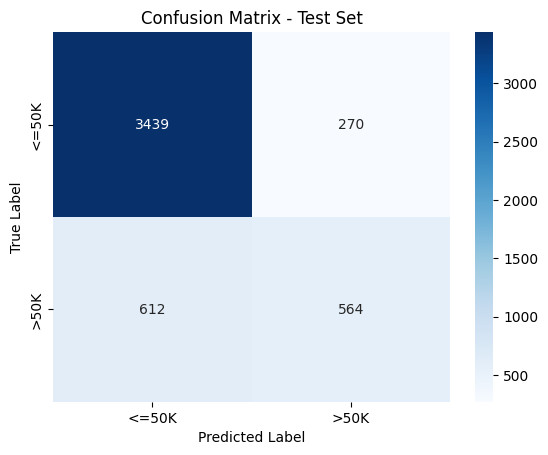

==> Features=['education', 'occupation', 'relationship'] <==
  Validation Accuracy=81.9615
  Validation Precision=65.3486
  Validation Recall=53.4014
  Validation F1 Score=58.7740

  Test Accuracy=81.5558
  Test Precision=64.1899
  Test Recall=52.8912
  Test F1 Score=57.9953

Confusion Matrix on Test Set:


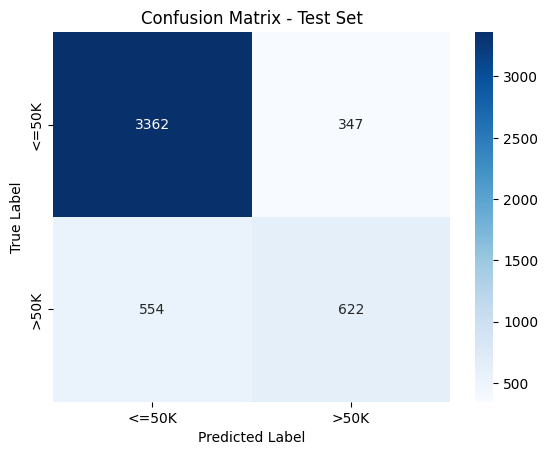

==> Features=['race', 'sex', 'native.country'] <==
  Validation Accuracy=75.8190
  Validation Precision=38.0952
  Validation Recall=0.6803
  Validation F1 Score=1.3367

  Test Accuracy=75.7011
  Test Precision=29.6296
  Test Recall=0.6803
  Test F1 Score=1.3300

Confusion Matrix on Test Set:


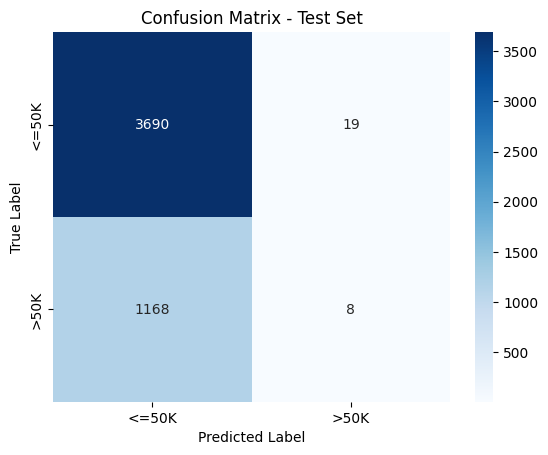

==> Features=['workclass', 'occupation', 'education'] <==
  Validation Accuracy=78.2555
  Validation Precision=56.0768
  Validation Recall=44.7279
  Validation F1 Score=49.7635

  Test Accuracy=77.8710
  Test Precision=55.1913
  Test Recall=42.9422
  Test F1 Score=48.3022

Confusion Matrix on Test Set:


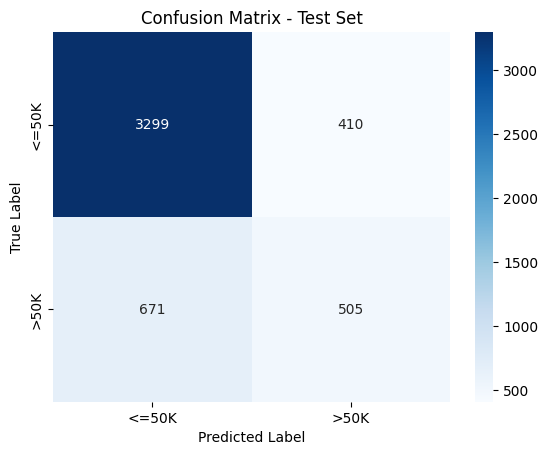

==> Features=['marital.status', 'relationship', 'sex'] <==
  Validation Accuracy=71.8468
  Validation Precision=44.9467
  Validation Recall=75.2551
  Validation F1 Score=56.2798

  Test Accuracy=70.8700
  Test Precision=43.8157
  Test Recall=74.4048
  Test F1 Score=55.1529

Confusion Matrix on Test Set:


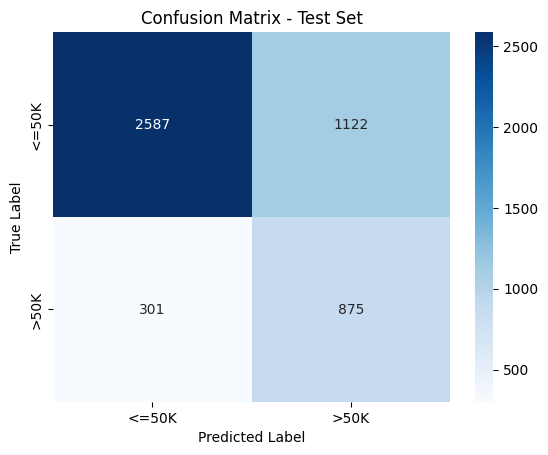

==> Features=['all'] <==
  Validation Accuracy=78.8903
  Validation Precision=54.6385
  Validation Recall=72.6190
  Validation F1 Score=62.3585

  Test Accuracy=79.1812
  Test Precision=55.0994
  Test Recall=73.0442
  Test F1 Score=62.8154

Confusion Matrix on Test Set:


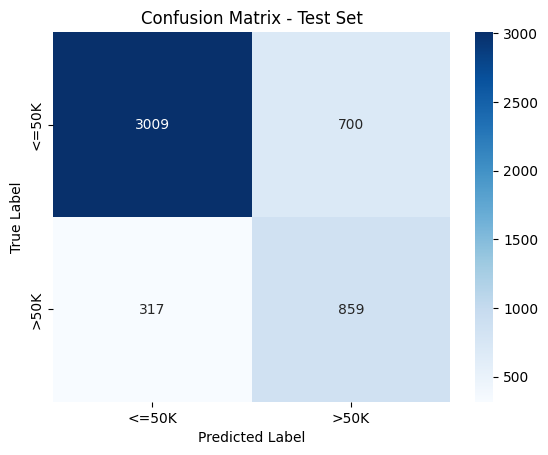

In [8]:
feature_subsets = [
    ['workclass', 'education', 'marital.status'],       
    ['education', 'occupation', 'relationship'],      
    ['race', 'sex', 'native.country'],                
    ['workclass', 'occupation', 'education'],      
    ['marital.status', 'relationship', 'sex'],           
    ['all']                                                    # all features
]


for subset in feature_subsets:
    if subset == ['all']:
        X_train_subset = x_train
        X_val_subset = x_val
    else:
        indices = [feature_names.index(f) for f in subset]
        X_train_subset = x_train[:, indices]
        X_val_subset = x_val[:, indices]

    nb = NaiveBayes(alpha=1.0)
    nb.train(X_train_subset, y_train)
    y_val_pred = nb.predict(X_val_subset)
    acc = accuracy_score(y_val, y_val_pred)*100
    precision = precision_score(y_val, y_val_pred,pos_label='>50K')*100
    recall = recall_score(y_val, y_val_pred,pos_label='>50K')*100
    f1 = f1_score(y_val, y_val_pred,pos_label='>50K')*100

    print(f"==> Features={subset} <==")
    y_test_pred = nb.predict(x_test[:, indices]) if subset != ['all'] else nb.predict(x_test)
    test_acc = accuracy_score(y_test, y_test_pred)*100
    test_precision = precision_score(y_test, y_test_pred,pos_label='>50K')*100
    test_recall = recall_score(y_test, y_test_pred,pos_label='>50K')*100
    test_f1 = f1_score(y_test, y_test_pred,pos_label='>50K')*100

    print(f"  Validation Accuracy={acc:.4f}")
    print(f"  Validation Precision={precision:.4f}")
    print(f"  Validation Recall={recall:.4f}")
    print(f"  Validation F1 Score={f1:.4f}")
    print()
    print(f"  Test Accuracy={test_acc:.4f}") 
    print(f"  Test Precision={test_precision:.4f}")
    print(f"  Test Recall={test_recall:.4f}")
    print(f"  Test F1 Score={test_f1:.4f}")
        
    print("\nConfusion Matrix on Test Set:")
    cm_test = confusion_matrix(y_test, y_test_pred, labels=['<=50K', '>50K'])
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix - Test Set')
    plt.show()

    print("="*50)



## Probability Analysis

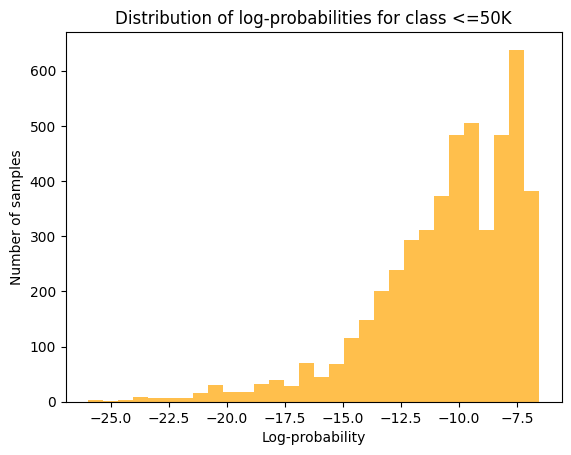

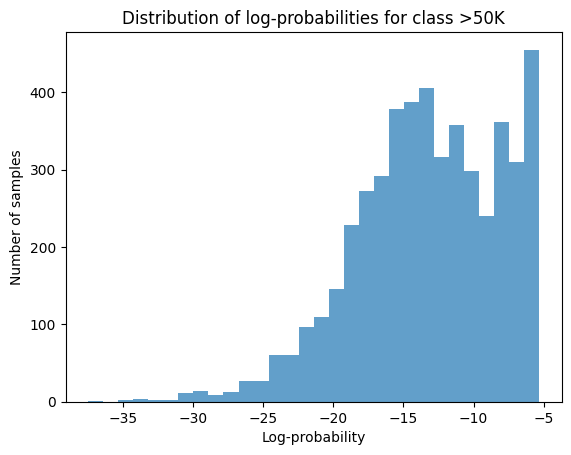

In [9]:

# probabilities for class <=50K
plt.hist(y_val_prob[:, 0], bins=30, alpha=0.7, color='orange')
plt.title("Distribution of log-probabilities for class <=50K")
plt.xlabel("Log-probability")
plt.ylabel("Number of samples")
plt.show()

# probabilities for class >50K
plt.hist(y_val_prob[:, 1], bins=30, alpha=0.7)
plt.title("Distribution of log-probabilities for class >50K")
plt.xlabel("Log-probability")
plt.ylabel("Number of samples")
plt.show()


## Built-in Model

Sklearn MultinomialNB Validation Accuracy: 74.8771%
Sklearn MultinomialNB Validation Precision: 47.7212%
Sklearn MultinomialNB Validation Recall: 45.4082%
Sklearn MultinomialNB Validation F1 Score: 46.5359%


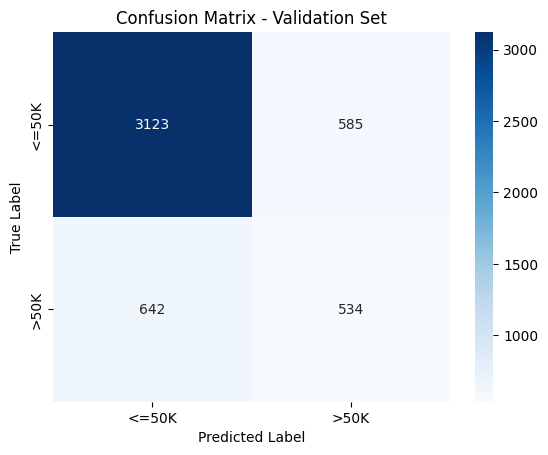

Sklearn MultinomialNB Test Accuracy: 74.4319%
Sklearn MultinomialNB Test Precision: 46.7206%
Sklearn MultinomialNB Test Recall: 44.2177%
Sklearn MultinomialNB Test F1 Score: 45.4347%


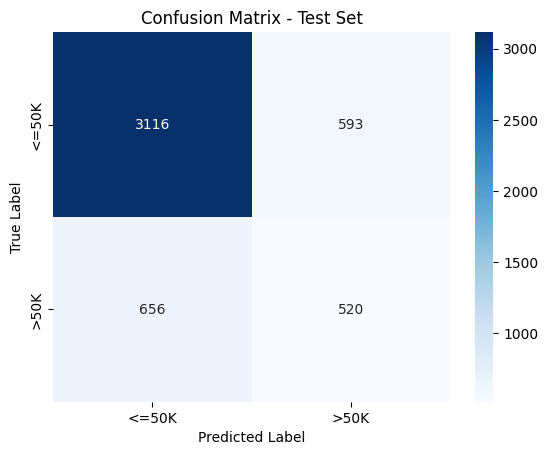

In [10]:

sk_nb = MultinomialNB(alpha=1.0)
sk_nb.fit(x_train, y_train)
y_val_pred_sk = sk_nb.predict(x_val)
sk_val_acc = accuracy_score(y_val, y_val_pred_sk,) * 100
sk_val_precision = precision_score(y_val, y_val_pred_sk, pos_label='>50K') * 100
sk_val_recall = recall_score(y_val, y_val_pred_sk, pos_label='>50K') * 100
sk_val_f1 = f1_score(y_val, y_val_pred_sk, pos_label='>50K') * 100
    
print(f"Sklearn MultinomialNB Validation Accuracy: {sk_val_acc:.4f}%")
print(f"Sklearn MultinomialNB Validation Precision: {sk_val_precision:.4f}%")
print(f"Sklearn MultinomialNB Validation Recall: {sk_val_recall:.4f}%")
print(f"Sklearn MultinomialNB Validation F1 Score: {sk_val_f1:.4f}%")
cm_val_sk = confusion_matrix(y_val, y_val_pred_sk, labels=['<=50K', '>50K'])
sns.heatmap(cm_val_sk, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Validation Set')
plt.show()  

y_test_pred_sk = sk_nb.predict(x_test)
sk_test_acc = accuracy_score(y_test, y_test_pred_sk) * 100
sk_test_precision = precision_score(y_test, y_test_pred_sk, pos_label='>50K') * 100
sk_test_recall = recall_score(y_test, y_test_pred_sk, pos_label='>50K') * 100
sk_test_f1 = f1_score(y_test, y_test_pred_sk, pos_label='>50K') * 100

print(f"Sklearn MultinomialNB Test Accuracy: {sk_test_acc:.4f}%")
print(f"Sklearn MultinomialNB Test Precision: {sk_test_precision:.4f}%")
print(f"Sklearn MultinomialNB Test Recall: {sk_test_recall:.4f}%")
print(f"Sklearn MultinomialNB Test F1 Score: {sk_test_f1:.4f}%")
cm_test_sk = confusion_matrix(y_test, y_test_pred_sk, labels=['<=50K', '>50K'])
sns.heatmap(cm_test_sk, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted Label')       
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Set')
plt.show()

## Models Comparison

Manual Implementation - Validation Accuracy: 78.8903%, Test Accuracy: 79.1812%
Manual Implementation - Validation Precision: 54.6385%, Test Precision: 55.0994%
Manual Implementation - Validation Recall: 72.6190%, Test Recall: 73.0442%
Manual Implementation - Validation F1 Score: 62.3585%, Test F1 Score: 62.8154%

Sklearn MultinomialNB - Validation Accuracy: 74.8771%, Test Accuracy: 74.4319%
Sklearn MultinomialNB - Validation Precision: 47.7212%, Test Precision: 46.7206%
Sklearn MultinomialNB - Validation Recall: 45.4082%, Test Recall: 44.2177%
Sklearn MultinomialNB - Validation F1 Score: 46.5359%, Test F1 Score: 45.4347%


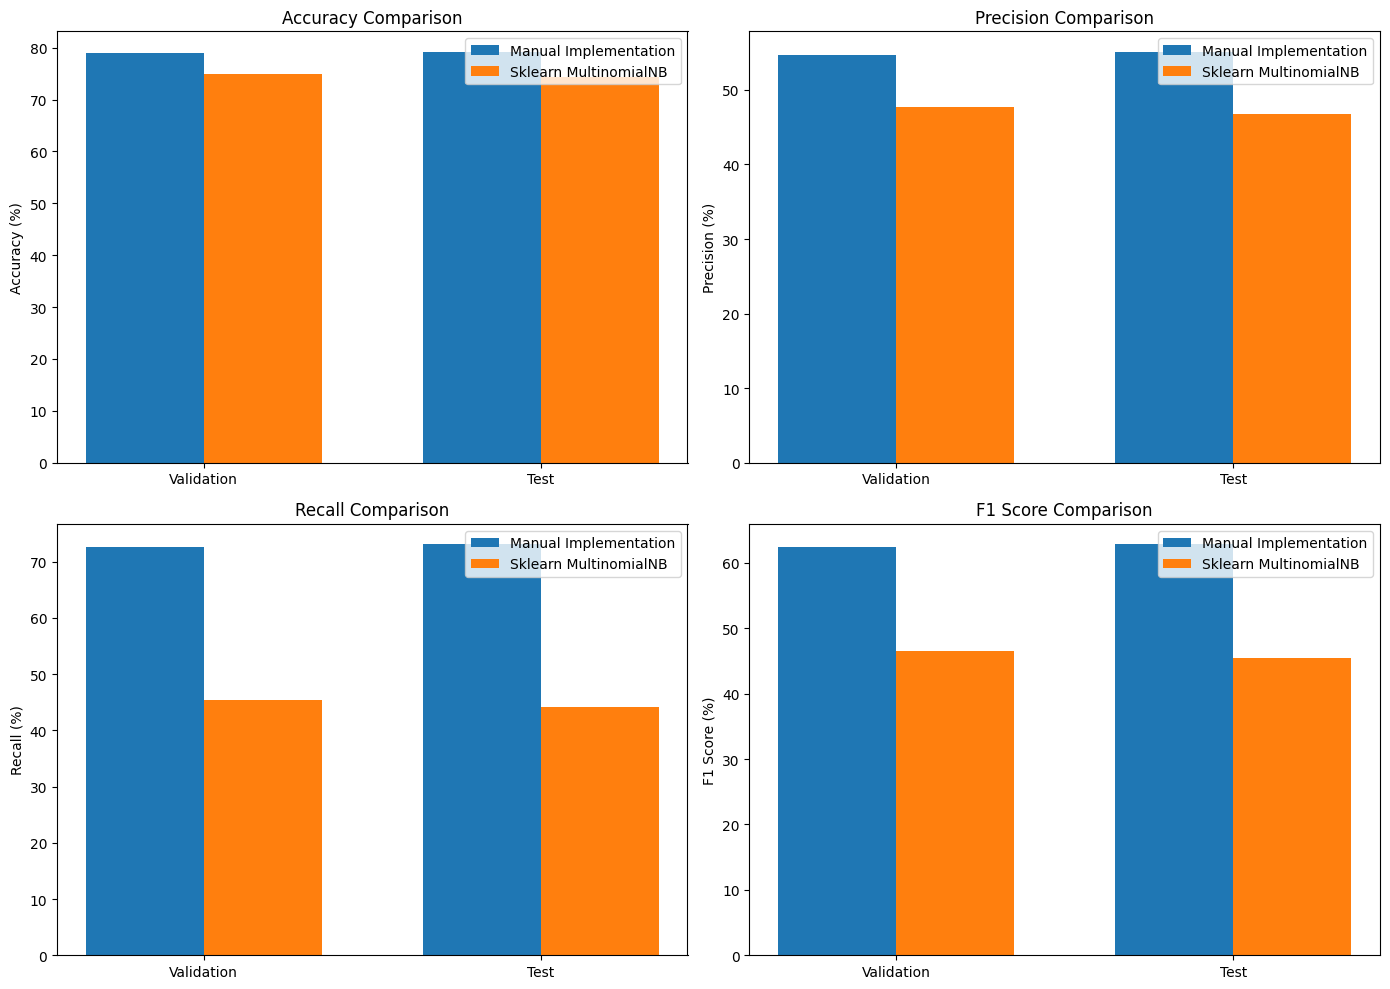

In [11]:
# Comparison of manual implementation vs sklearn 
print(f"Manual Implementation - Validation Accuracy: {val_accuracy:.4f}%, Test Accuracy: {test_accuracy:.4f}%")
print(f"Manual Implementation - Validation Precision: {val_precision:.4f}%, Test Precision: {test_precision:.4f}%")
print(f"Manual Implementation - Validation Recall: {val_recall:.4f}%, Test Recall: {test_recall:.4f}%")
print(f"Manual Implementation - Validation F1 Score: {val_f1:.4f}%, Test F1 Score: {test_f1:.4f}%")
print()

print(f"Sklearn MultinomialNB - Validation Accuracy: {sk_val_acc:.4f}%, Test Accuracy: {sk_test_acc:.4f}%")
print(f"Sklearn MultinomialNB - Validation Precision: {sk_val_precision:.4f}%, Test Precision: {sk_test_precision:.4f}%")
print(f"Sklearn MultinomialNB - Validation Recall: {sk_val_recall:.4f}%, Test Recall: {sk_test_recall:.4f}%")
print(f"Sklearn MultinomialNB - Validation F1 Score: {sk_val_f1:.4f}%, Test F1 Score: {sk_test_f1:.4f}%")

# plotting comparison bar chart
labels = ['Validation', 'Test']   
manual_acc = [val_accuracy, test_accuracy]
sklearn_acc = [sk_val_acc, sk_test_acc]
manual_precision = [val_precision, test_precision]
sklearn_precision = [sk_val_precision, sk_test_precision]
manual_recall = [val_recall, test_recall]
sklearn_recall = [sk_val_recall, sk_test_recall]
manual_f1 = [val_f1, test_f1]
sklearn_f1 = [sk_val_f1, sk_test_f1]

x = np.arange(len(labels))
width = 0.35

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy
axes[0, 0].bar(x - width/2, manual_acc, width, label='Manual Implementation')
axes[0, 0].bar(x + width/2, sklearn_acc, width, label='Sklearn MultinomialNB')
axes[0, 0].set_ylabel('Accuracy (%)')
axes[0, 0].set_title('Accuracy Comparison')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(labels)
axes[0, 0].legend()

# Precision
axes[0, 1].bar(x - width/2, manual_precision, width, label='Manual Implementation')
axes[0, 1].bar(x + width/2, sklearn_precision, width, label='Sklearn MultinomialNB')
axes[0, 1].set_ylabel('Precision (%)')
axes[0, 1].set_title('Precision Comparison')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(labels)
axes[0, 1].legend()

# Recall
axes[1, 0].bar(x - width/2, manual_recall, width, label='Manual Implementation')
axes[1, 0].bar(x + width/2, sklearn_recall, width, label='Sklearn MultinomialNB')
axes[1, 0].set_ylabel('Recall (%)')
axes[1, 0].set_title('Recall Comparison')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(labels)
axes[1, 0].legend()

# F1 Score
axes[1, 1].bar(x - width/2, manual_f1, width, label='Manual Implementation')
axes[1, 1].bar(x + width/2, sklearn_f1, width, label='Sklearn MultinomialNB')
axes[1, 1].set_ylabel('F1 Score (%)')
axes[1, 1].set_title('F1 Score Comparison')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(labels)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

#### Independence Assumption in Naive Bayes

Naive Bayes assumes features are conditionally independent given the class. In practice, features are often correlated (e.g., radius_mean and perimeter_mean in Breast Cancer data). Violating this assumption can make probability estimates inaccurate, but the classifier often still performs well for predicting class labels.